In [1]:
import sys
sys.path.insert(0, '../../_libs/')
import NEMO_tools as Nts

In [2]:
import glob
import datetime
import scipy.io
import numpy as np
import seaborn as sb
import netCDF4 as nc
import matplotlib.pyplot as plt
from scipy.signal import detrend
import matplotlib.patches as mpatches
from mpl_toolkits.basemap import Basemap, cm
% matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [3]:
sb.set_style('white')

In [4]:
RB=[0.25, 0.41, 0.88]    # Royal blue
AM=[0.90, 0.17, 0.31]    # Amathran
SB=[0.06, 0.05, 0.03]    # Smokey Black
AFB = [0.36, 0.54, 0.66] # Air Force Blue
AG = [0.55, 0.71, 0.0]   # Apple Green
AZ = [0.0, 0.5, 1.0]     # Azure
CB = [0.37, 0.62, 0.63]  # Cadet blue
SP = [1.0, 0.72, 0.77]   # Sakura
CamB = [0.64, 0.76, 0.68]# Cambridge blue
DC = [0.0, 0.55, 0.55]   # Dark cyan
DE = [0.08, 0.38, 0.74]  # Denim
BB = [0.54, 0.81, 0.94]  # Baby blue

In [5]:
Mon = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [142]:
def seasonal_cycle(data):
    out = np.empty([12, np.size(data, 1), np.size(data, 2)])
    for mon in range(12):
        out[mon, :, :] = np.nanmean(data[mon:len(data):12, :, :], 0)
    return out
def seasonal_decomp3d(data):
    anom = np.empty(data.shape)
    for mon in range(12):
        temp_data = np.nanmean(data[mon:len(data):12, :, :], 0)
        anom[mon:len(data):12, :, :] = data[mon:len(data):12, :, :]-temp_data
    return anom
def monmean_3d(data):
    monmean=np.zeros([12, np.size(data, axis=1), np.size(data, axis=2)])
    for mon in range(12):
        monmean[mon, :, :] = np.nanmean(data[mon:len(data):12, :, :], 0)
    return monmean

In [129]:
ETOPO2_Arctic=scipy.io.loadmat('../../_libs/ETOPO2_Arctic.mat')
lon_arctic=ETOPO2_Arctic['lon_arctic']
lat_arctic=ETOPO2_Arctic['lat_arctic']
topo_arctic=ETOPO2_Arctic['topo_arctic']
#
res_unit=5
lon_arctic=lon_arctic[0:-1:res_unit, 0:-1:res_unit]
lat_arctic=lat_arctic[0:-1:res_unit, 0:-1:res_unit]
topo_arctic=topo_arctic[0:-1:res_unit, 0:-1:res_unit]*-1

In [249]:
ice_name = '/ocean/yingkai/GEOTRACES/FORCING/ANHA4/ileadfra_monmean.nc'
ice_obj = nc.Dataset(ice_name)
ice = ice_obj.variables['ileadfra'][:]
ice_monmean = monmean_3d(ice)
ice_sep = ice_monmean[8, :, :]
id_ice = ice_sep > 0.7
#id_ice_reverse = ice_sep <= 0.7

In [250]:
FName = '/ocean/yingkai/GEOTRACES/Simulations/BASE03_1m_20020101_20131231_ptrc_T.nc'

In [251]:
ptrc_obj = nc.Dataset(FName)
d18O = np.squeeze(ptrc_obj.variables['d18O'][:, 0, :, :])
Ba = np.squeeze(ptrc_obj.variables['Ba'][:, 0, :, :])
d18O[Ba==0]=np.nan
#d18O = np.nanmean(d18O, 1) 
d18O[:, ~id_ice]=np.nan
d18O_all = np.squeeze(ptrc_obj.variables['d18O'][:, 0, :, :])
d18O_all[Ba==0]=np.nan
nav_lat = ptrc_obj.variables['nav_lat'][:]
nav_lon = ptrc_obj.variables['nav_lon'][:]
deptht = ptrc_obj.variables['deptht'][:]

In [252]:
#MAT = scipy.io.loadmat('../../_data/Exchange/dtrend_d18O.mat')
#d18O = MAT['dtrend_d18O'][:]

In [253]:
#d18O_anom = seasonal_decomp3d(d18O)
d18O_monmean = seasonal_cycle(d18O)
d18O_monmean_all = seasonal_cycle(d18O_all)

In [254]:
d18O_t = np.nanmean(np.nanmean(d18O, 1), 1)
d18O_stack = np.reshape(d18O_t, [12, 12])
d18O_stack_min = np.min(d18O_stack, 0)
d18O_stack_mean = np.mean(d18O_stack, 0)
d18O_stack_max = np.max(d18O_stack, 0)
fake_x = range(1, 13)

In [255]:
from dateutil.relativedelta import relativedelta

base = datetime.datetime(2001, 1, 1)
date_list = [base + relativedelta(months=x) for x in range(168)]

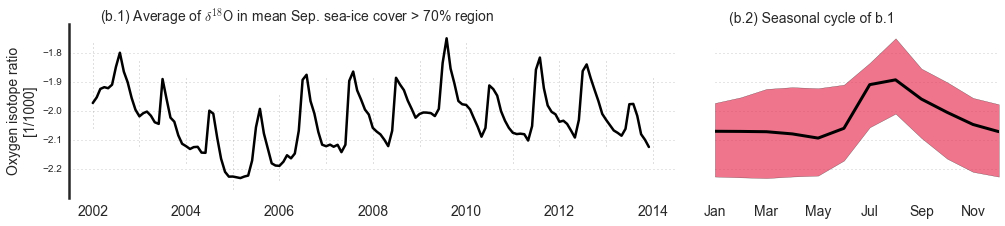

In [321]:
fig = plt.figure(figsize=(13.6, 3))

ax1 = plt.subplot2grid((1, 3), (0, 0), colspan=2, rowspan=1)
ax2 = plt.subplot2grid((1, 3), (0, 2), colspan=1, rowspan=1)
fig.tight_layout()
fig.subplots_adjust(hspace=0.01)
AX = [ax1, ax2]
for i in range(2):
    AX[i].grid(linestyle=':')
    AX[i].xaxis.grid(False)
    AX[i].spines["top"].set_visible(False)
    AX[i].spines["bottom"].set_visible(False) 
    AX[i].spines["right"].set_visible(False)
    AX[i].xaxis.set_tick_params(labelsize=14)
    [j.set_linewidth(2.5) for j in AX[i].spines.itervalues()]
    
ax1.set_yticks(np.arange(-2.2, -1.8, 0.1)); ax1.set_ylim([-2.3, -1.7])
ax1.set_ylabel('Oxygen isotope ratio\n[1/1000]', fontsize=14)
ax1.set_xlim([date_list[6], date_list[-6]])
ax1.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")

for i in [12, 108]:
    ax1.axvline(date_list[i], ymin=0.4, ymax=0.9, lw=0.5, ls=':', color='gray')
for i in [24, 96, 132, 144]:
    ax1.axvline(date_list[i], ymin=0.3, ymax=0.8, lw=0.5, ls=':', color='gray')
for i in [36, 72, 84, 120, 156]:
    ax1.axvline(date_list[i], ymin=0.2, ymax=0.7, lw=0.5, ls=':', color='gray')  
for i in [60]:
    ax1.axvline(date_list[i], ymin=0.1, ymax=0.6, lw=0.5, ls=':', color='gray') 
for i in [48]:
    ax1.axvline(date_list[i], ymin=0.05, ymax=0.5, lw=0.5, ls=':', color='gray')   
    
    
ax2.spines["left"].set_visible(False)
ax2.set_yticks(np.arange(-2.2, -1.8, 0.1)); ax2.set_ylim([-2.3, -1.7])
ax2.set_xlim([1, 12]); ax2.set_xticks(fake_x[::2]); ax2.set_xticklabels(Mon[::2])
ax2.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="off")

#patch = mpatches.Patch(color=RB, alpha=0.65, label="muti-year min/max")
#legend_handle = plt.legend(handles=[patch], bbox_to_anchor=(1.05, 1), frameon=False, prop={'size':12})
#ax2.add_artist(legend_handle)

ax1.plot(date_list[12:-12], d18O_t, '-', color='k', lw=2.5)
ax1.set_title('(b.1) Average of $\mathsf{\delta^{18}O}$ in mean Sep. sea-ice cover > 70% region', x=0.05, y=0.98, loc='left', fontsize=14)
ax2.fill_between(fake_x, d18O_stack_min, d18O_stack_max, facecolor=AM, edgecolor=None, interpolate=True, alpha=0.65)
ax2.plot(fake_x, d18O_stack_mean, color='k', lw=3)
ax2.set_title('(b.2) Seasonal cycle of b.1', x=0.05, y=0.98, loc='left', fontsize=14)

fig.savefig('../../d18O_Part2.png', dpi=300, orientation='portrait', papertype='a4', format='png',
                bbox_inches='tight', pad_inches=0.1)

In [121]:
lev1 = np.array([-5, -4, -3.5, -3, -2.5, -2, -1.5, -1.25, -1, -0.75, -0.5, -0.25, 0, 0.25, 0.5])

In [234]:
lev2 = np.array([-9, -7, -5, -3, -1, 1, 3, 5, 7, 9])/10.0

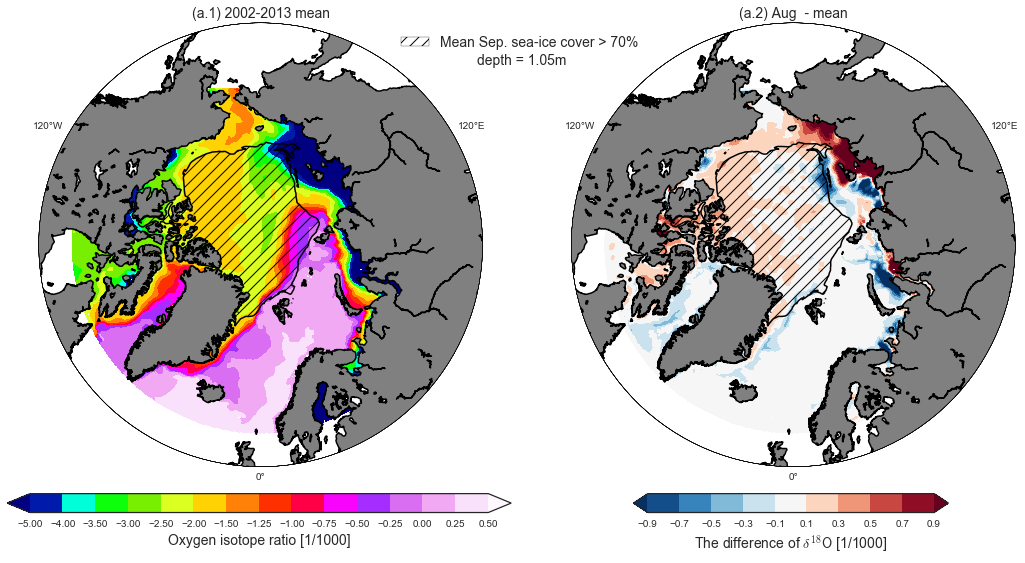

In [335]:
fig=plt.figure(figsize=(17.5, 17.5));

ax1 = plt.subplot2grid((1, 2), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((1, 2), (0, 1), colspan=1, rowspan=1)
#ax = fig.gca()

proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=0, round=True, ax=ax1)
proj.drawmeridians(np.arange(0, 360, 120), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y=proj(nav_lon, nav_lat)

CS1 = proj.contourf(x, y, np.nanmean(d18O_monmean_all, 0), lev1, cmap=plt.cm.gist_ncar, extend='both')
proj.contour(x, y, ice_sep*100, [70], colors=('k',), linewidths=1.5, zorder=4)
proj.contourf(x, y, ice_sep*100, [70, 100], hatches=['//', ' '], colors='none', zorder=4)
ax1.set_title('(a.1) 2002-2013 mean', fontsize=14)

proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=0, round=True, ax=ax2)
proj.drawmeridians(np.arange(0, 360, 120), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y=proj(nav_lon, nav_lat)
CS2 = proj.contourf(x, y, d18O_monmean_all[7, :, :]-np.nanmean(d18O_monmean_all, 0), lev2, cmap=plt.cm.RdBu_r, extend='both')
proj.contour(x, y, ice_sep*100, [70], colors=('k',), linewidths=1.5, zorder=4)
CS3 = proj.contourf(x, y, ice_sep*100, [70, 100], hatches=['//', ' '], colors='none', zorder=4)
ax2.set_title('(a.2) Aug  - mean', fontsize=14)

artists, _ = CS3.legend_elements()
labels = ['Mean Sep. sea-ice cover > 70%']
ax1.legend(artists, labels, bbox_to_anchor=(1.38, 1), prop={'size':14})
cax = fig.add_axes([0.1, 0.3, 0.4, 0.015])
CBar = fig.colorbar(CS1, cax=cax, orientation='horizontal')
CBar.set_label('Oxygen isotope ratio [1/1000]', fontsize=14)
CBar.ax.tick_params(axis='x', length=0)
CBar.set_ticks(lev1)

cax = fig.add_axes([0.597, 0.3, 0.25, 0.015])
CBar = fig.colorbar(CS2, cax=cax, orientation='horizontal')
CBar.set_label('The difference of $\mathsf{\delta^{18}O}$ [1/1000]', fontsize=14)
CBar.ax.tick_params(axis='x', length=0)
CBar.set_ticks(lev2)

ax1.text(8.75e6, 7.35e6, 'depth = 1.05m',
        horizontalalignment='center',
        verticalalignment='center', fontsize=14)

fig.savefig('../../d18O_Part1.png', dpi=300, orientation='portrait', papertype='a4', format='png',
                bbox_inches='tight', pad_inches=0.1)

In [286]:
labels

[u'$70.0 < x \\leq 100.0$']